# Preprocessing Amazon data

## Import library

In [96]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# To avoid Warning message inbetween ...
import warnings
warnings.filterwarnings('ignore')

In [97]:
# with open("../../dataset/Amazon/amazon_product_infos.csv", encoding='utf-8') as f:
#     with open('../../dataset/Amazon/amazon_product_infos_pre.csv', 'w', encoding='utf-8') as g:
#         line = f.readline()
#         print(line)
#         count = 0
#         while line != '':
#             line = line[1:-1]
#             datas = line.split('\t')
#             datas[len(datas)-1] = datas[len(datas)-1][:datas[len(datas)-1].find('",,,')]
#             item = '\t'.join(datas) + '\n'
#             g.write(item)
#             line = f.readline()

## Read data

In [98]:
df = pd.read_csv("../../dataset/Amazon/amazon_product_infos_pre.csv", encoding='utf-8', sep='\t', index_col=False )
df.head(10)

,Price,Screen Size,Max Screen Resolution,Processor,RAM,Hard Drive,Graphics Coprocessor,Chipset Brand,Card Description,Wireless Type,...,Rear Webcam Resolution,Power Source,Voltage,Memory Speed,California residents,Graphics Card Ram Size,National Stock Number,Package Dimensions,Audio-out Ports (#),Battery Type
0,$309.99,15.6 inches,1920 x 1080,3.5 GHz Ryzen 3 2200U,4 GB DDR4,128 GB Flash Memory Solid State,AMD Radeon Vega 3,AMD,Integrated,802.11ac,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,$162.92,10.1 inches,1920x1200 pixels,1.8 GHz 8032,2 GB,32 GB,Mali-G71 MP2,NaN,Integrated,"802.11a/b/g/n/ac"", 2.4 GHz Radio Frequency,"" 5...",...,8 MP,Battery,5 volts,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,$246.99,11.6 inches,1366X768 pixels,2.1 GHz MediaTek_MT8127,4 GB LPDDR3,64 GB Flash Memory Solid State,PowerVR SGX543,Intel,Integrated,"802.11a"", 802.11b,"" 802.11g",...,NaN,NaN,NaN,1600 MHz,Click here for Proposition 65 warning,NaN,NaN,NaN,NaN,NaN
3,"1 ,""089.00",15.6 inches,1920 x 1080,4.5 GHz Intel Core i7,16 GB DDR4,256 GB Flash Memory Solid State,NaN,NVIDIA,Dedicated,802.11ac,...,NaN,NaN,NaN,NaN,NaN,6 GB,NaN,NaN,NaN,NaN
4,$127.97,11.6 inches,1366 x 768 pixels,2.1 GHz MediaTek MT8125,4 GB DDR4,Flash Memory Solid State,PowerVR GX6250,Chromebook,Mediatek,Bluetooth,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,$536.97,14 inches,1440 x 900 pixels,2.1 GHz AMD R Series,12 GB DDR4,Flash Memory Solid State,AMD Radeon Vega 8,AMD,Integrated,Bluetooth,...,NaN,NaN,NaN,2400 MHz,NaN,NaN,NaN,NaN,NaN,NaN
6,$306.99,15.6 inches,1920 x 1080 pixels,2.2 GHz Intel Core i3,6 GB DDR3,1000 GB Mechanical Hard Drive,Intel HD Graphics 620,Intel,Integrated,802.11ac,...,NaN,NaN,100240 volts,NaN,NaN,2 GB,NaN,NaN,NaN,NaN
7,$147.00,10.1 inches,1920x1200 pixels,1.6 GHz Samsung Exynos 4210,2 GB DDR3,16 GB Hybrid Drive,1,NaN,Dedicated,Infrared,...,8 MP,"Corded-Electric"","" Battery",NaN,1866 MHz,NaN,NaN,NaN,NaN,NaN,NaN
8,$219.00,11.6 inches,NaN,1.6 GHz Celeron N,4 GB,64 GB 32GB eMMC,MediaTek,NaN,NaN,802.11ac,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,$449.99,15.6 inches,1920 x 1080,3.9 GHz Intel Core i5,8 GB DDR4,256 GB Flash Memory Solid State,Intel UHD Graphics 620,Intel,Integrated,802.11ac,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5764 entries, 0 to 5763
Data columns (total 41 columns):
Price                              5675 non-null object
Screen Size                        5338 non-null object
Max Screen Resolution              3889 non-null object
Processor                          5530 non-null object
RAM                                5660 non-null object
Hard Drive                         5632 non-null object
Graphics Coprocessor               4912 non-null object
Chipset Brand                      3932 non-null object
Card Description                   4325 non-null object
Wireless Type                      4303 non-null object
Number of USB 2.0 Ports            1696 non-null float64
Number of USB 3.0 Ports            1270 non-null float64
Brand Name                         5742 non-null object
Series                             5347 non-null object
Item model number                  4558 non-null object
Operating System                   5191 non-null ob

## Preprocessing data

### 1. Drop column has many NaN value

In [100]:
df.isna().sum()

Price                                89
Screen Size                         426
Max Screen Resolution              1875
Processor                           234
RAM                                 104
Hard Drive                          132
Graphics Coprocessor                852
Chipset Brand                      1832
Card Description                   1439
Wireless Type                      1461
Number of USB 2.0 Ports            4068
Number of USB 3.0 Ports            4494
Brand Name                           22
Series                              417
Item model number                  1206
Operating System                    573
Item Weight                           1
Product Dimensions                  905
Item Dimensions L x W x H           905
Color                              2718
Processor Brand                     736
Processor Count                     128
Computer Memory Type               1563
Flash Memory Size                  1743
Hard Drive Interface               1454


In [101]:
df.isna().sum().describe()

count      41.000000
mean     2412.000000
std      1999.674849
min         1.000000
25%       736.000000
50%      1563.000000
75%      4156.000000
max      5752.000000
dtype: float64

In [102]:
# Drop > 75% NaN values of columns
MAX_NAN_COUNT = 4156

In [103]:
drop_cols_name = [col for col in df.columns if df[col].isna().sum() > MAX_NAN_COUNT]
drop_cols_name
# for i in drop_cols_name:
#     print(df[i].isna().sum())

['Number of USB 3.0 Ports',
 'Rear Webcam Resolution',
 'Voltage',
 'Memory Speed',
 'California residents',
 'Graphics Card Ram Size',
 'National Stock Number',
 'Package Dimensions',
 'Audio-out Ports (#)',
 'Battery Type']

In [104]:
df.drop(columns=drop_cols_name, axis=1, inplace=True)

### 2. Normalize columns name

In [105]:
[str(v) for v in df.columns]

['Price',
 'Screen Size',
 'Max Screen Resolution',
 'Processor',
 'RAM',
 'Hard Drive',
 'Graphics Coprocessor',
 'Chipset Brand',
 'Card Description',
 'Wireless Type',
 'Number of USB 2.0 Ports',
 'Brand Name',
 'Series',
 'Item model number',
 'Operating System',
 'Item Weight',
 'Product Dimensions',
 'Item Dimensions L x W x H',
 'Color',
 'Processor Brand',
 'Processor Count',
 'Computer Memory Type',
 'Flash Memory Size',
 'Hard Drive Interface',
 'Hard Drive Rotational Speed',
 'Optical Drive Type',
 'Batteries',
 'Screen Resolution',
 'Average Battery Life (in hours)',
 'Hardware Platform',
 'Power Source']

### 3. Get price

In [106]:
def handle_price(s):
    s = str(s)
    for ch in ['$', '"', '\'', ',', ' ']:
        s = s.replace(ch, '')
    return s

In [107]:
float(handle_price('1,"343,324.2'))

1343324.2

In [108]:
df['Price'] = df['Price'].map(handle_price)
df['Price'] = df['Price'].astype(float)

### 4. Drop NaN value in __Price__

In [117]:
df.dropna(subset=['Price'], how='all', inplace=True)

### 5. #

In [120]:
df.nunique()

Price                              2858
Screen Size                          92
Max Screen Resolution               279
Processor                           987
RAM                                 321
Hard Drive                          427
Graphics Coprocessor                866
Chipset Brand                        66
Card Description                     57
Wireless Type                       133
Number of USB 2.0 Ports              11
Brand Name                          295
Series                             2572
Item model number                  3534
Operating System                    187
Item Weight                         950
Product Dimensions                 2007
Item Dimensions L x W x H          2520
Color                               423
Processor Brand                      95
Processor Count                      11
Computer Memory Type                 28
Flash Memory Size                    77
Hard Drive Interface                 43
Hard Drive Rotational Speed          62


# Save file

In [119]:
df.to_csv("../amazon.csv",index=0)

# Other

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5675 entries, 0 to 5763
Data columns (total 31 columns):
Price                              5675 non-null float64
Screen Size                        5256 non-null object
Max Screen Resolution              3825 non-null object
Processor                          5449 non-null object
RAM                                5571 non-null object
Hard Drive                         5543 non-null object
Graphics Coprocessor               4835 non-null object
Chipset Brand                      3871 non-null object
Card Description                   4264 non-null object
Wireless Type                      4232 non-null object
Number of USB 2.0 Ports            1675 non-null float64
Brand Name                         5653 non-null object
Series                             5266 non-null object
Item model number                  4503 non-null object
Operating System                   5103 non-null object
Item Weight                        5674 non-null ob

In [129]:
df.iloc[3]

Price                                                                          1089
Screen Size                                                             15.6 inches
Max Screen Resolution                                                   1920 x 1080
Processor                                                     4.5 GHz Intel Core i7
RAM                                                                      16 GB DDR4
Hard Drive                                          256 GB Flash Memory Solid State
Graphics Coprocessor                                                            NaN
Chipset Brand                                                                NVIDIA
Card Description                                                          Dedicated
Wireless Type                                                              802.11ac
Number of USB 2.0 Ports                                                         NaN
Brand Name                                                                  

In [ ]:
df.iloc[0]

In [ ]:
#Quick Analysis on Dataset : DataTypes, Rows and Columns ,Null values, Unique values ...
def quick_analysis(df):
    print("Data Types:")
    print(df.dtypes)
    print("\nRows and Columns:")
    print(df.shape)
    print("\nColumn names:")
    print(df.columns)
    print("\nNull Values")
    print(df.apply(lambda x: sum(x.isnull()) / len(df)))
    print("\nUnique values")
    print(df.nunique())

quick_analysis(df)

#### EDA

In [ ]:
#Visual Exploratory Data Analysis (EDA) And Your First Model
#EDA on Feature Variables
print(list(set(df.dtypes.tolist())))
df_object = df.select_dtypes(include=["object"]).copy()
df_int = df.select_dtypes(include=['int64']).copy()

categorical = df_object.columns
numerical = df_int.columns

print("Datashape of Object Dataframe:",df_object.shape)
print("Datashape of Interger Dataframe:",df_int.shape)

NameError: name 'categorical' is not defined

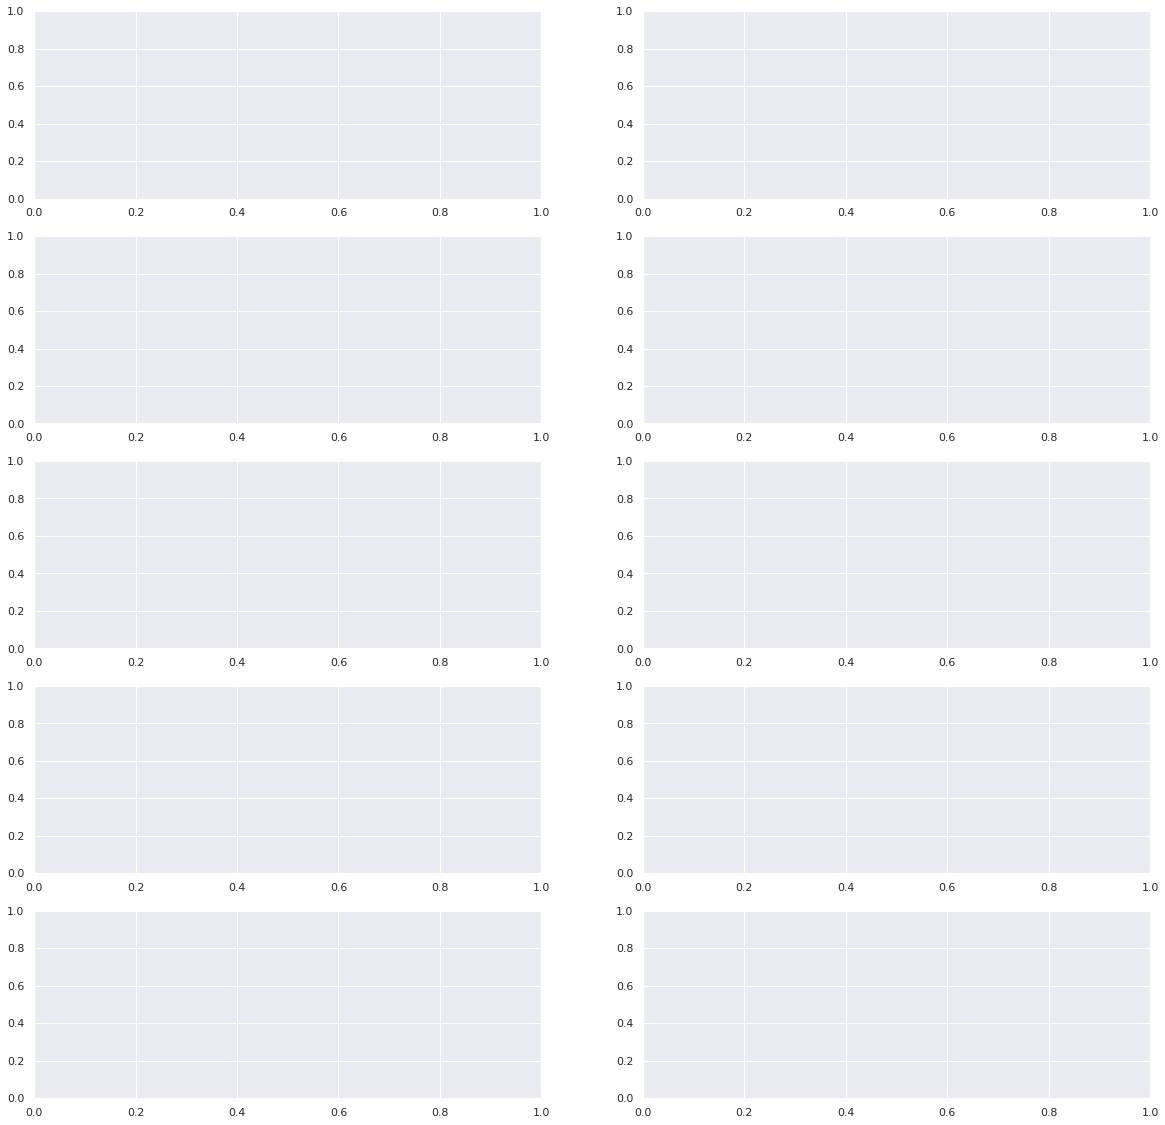

In [79]:
# Univariate Analysis
# EDA with Categorical Variables

fig,ax = plt.subplots(5,2, figsize=(20,20))
for variable,subplot in zip(categorical,ax.flatten()):
    sns.countplot(df[variable],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(20)

In [ ]:
# EDA with Numerical Variables
# df[numerical].hist(bins=50,figsize=(16,20),layout=(8,3))